In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [13]:
import pandas as pd
import numpy as np
from os import listdir,mkdir
from os.path import isfile, join,exists
import json
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [6]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
test_folders=['armraise','bicyclecrunch','birddog','curl','fly','leg raise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
test_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/test'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=100



In [5]:
def fetch_data(finalPath,data_type,frame_size=1,fetching_type="train"):
        pd_all_data=pd.DataFrame()
        all_files={}
        files_array=np.empty(shape=[0,28])
        id_count=0
        label_array=np.array([])
        id_dict={}
        key_word_extract='pixels'
        angle_key_word_extract='angles'
        pixel_key_word_extract='pixels'
        feauters=0
        video_length=0
        rep_length=0
        if(data_type=='angles'):
              key_word_extract=angle_key_word_extract
        else:
          key_word_extract=pixel_key_word_extract

        f = open(join(finalPath))
        data = json.load(f)
        one_file={}
        video_length+=1
        for i in range(0,len(data['reps'])):
                #                     print(data['reps'][i]['pixels'].keys())
            feauters=0
            rep_length+=1
            for key in data['reps'][i][key_word_extract]:
                #     print(key)
                    
                    feauters+=1
                    if(not(key in one_file)):
                        one_file[key]=np.array([])
                    
                    one_file[key]=np.append(one_file[key],np.array(data['reps'][i][key_word_extract][key])-np.mean(np.array(data['reps'][i][key_word_extract][key])))
            frames=len(data['reps'][i][key_word_extract][key])
            # print(frames)
            if(not('label' in one_file)):
                one_file['rep_id']=np.array([])
                one_file['label']=np.array([])
                one_file['vedio_id']=np.array([])
            one_file["label"]=np.append(one_file["label"],np.array([data['reps'][i]['label']]*frames))
            one_file["rep_id"]=np.append(one_file["rep_id"],np.array([rep_length]*frames))
            one_file["vedio_id"]=np.append(one_file["vedio_id"],np.array([video_length]*frames))
        # print(one_file.size)
        for key in one_file:
                # print(one_file[key].size)
                if(not(key in all_files)):
                        all_files[key]=np.array([])
                all_files[key]=np.append(all_files[key],one_file[key][0:(one_file[key].size//frame_size)*frame_size])
        pd_one_file=pd.DataFrame.from_dict(one_file)

        pd_all_data = pd.DataFrame.from_dict(all_files)
        # y=
        # pd_all_data=pd_all_data.transpose()

        return pd_all_data,files_array,label_array,feauters 

In [11]:
pd_test_angle_data,data_array,label_array,feauters=fetch_data("gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/test/curl/angle/test_video_004.json",'angles',frame_size,fetching_type="test")
pd_test_postion_data,data_array,label_array,feauters=fetch_data('gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/test/curl/positions/test_video_004.json','pixels',frame_size,fetching_type="test")
pd_test_angle_data

,angle_right_hand_elbow,angle_left_hand_elbow,angle_right_hand_shoulder,angle_left_hand_shoulder,angle_right_hip,angle_left_hip,angle_right_knee,angle_left_knee,rep_id,label,vedio_id
0,-102.748006,-38.577974,-7.276279,-3.275276,-1.643747,1.658855,4.311543,-0.448607,1.0,curl,1.0
1,-102.748006,-38.577974,-7.276279,-3.275276,-1.643747,1.658855,4.311543,-0.448607,1.0,curl,1.0
2,-94.772991,-42.379026,-7.818494,-5.030919,-0.343138,1.658855,1.580624,-0.547906,1.0,curl,1.0
3,-94.772991,-40.623383,-7.818494,-4.178185,-0.343138,3.892545,1.580624,-3.237993,1.0,curl,1.0
4,-92.989046,-40.271221,-8.533764,-3.763010,-0.205297,2.428277,1.545709,-1.907212,1.0,curl,1.0
...,...,...,...,...,...,...,...,...,...,...,...
595,20.406136,46.978560,3.467971,7.052366,-1.216293,-3.004135,0.085210,0.725625,1.0,curl,1.0
596,18.339033,41.340732,1.400867,7.645482,-1.276732,0.179042,0.112395,-0.574992,1.0,curl,1.0
597,18.339033,41.340732,1.400867,7.645482,-1.276732,0.179042,0.112395,-0.574992,1.0,curl,1.0
598,18.339033,37.967445,1.400867,8.557710,-1.276732,-2.097114,0.112395,0.788936,1.0,curl,1.0


In [12]:
pd_test_postion_data

,left_eye_smplhf_X,right_eye_smplhf_X,left_shoulder_X,right_shoulder_X,left_elbow_X,right_elbow_X,left_wrist_X,right_wrist_X,left_hip_X,right_hip_X,...,right_wrist_Y,left_hip_Y,right_hip_Y,left_knee_Y,right_knee_Y,left_ankle_Y,right_ankle_Y,rep_id,label,vedio_id
0,-0.253521,-0.051643,-1.547731,-2.262911,0.109546,-2.364632,13.00313,-30.242567,0.114241,-0.444444,...,17.960876,-1.881064,-2.023474,-2.533646,-1.209703,-2.785603,-3.485133,1.0,curl,1.0
1,-0.253521,-1.051643,-1.547731,-2.262911,0.109546,-3.364632,13.00313,-27.242567,0.114241,-0.444444,...,16.960876,-1.881064,-2.023474,-2.533646,-2.209703,-2.785603,-3.485133,1.0,curl,1.0
2,-0.253521,-0.051643,-1.547731,-2.262911,0.109546,-3.364632,13.00313,-27.242567,0.114241,-0.444444,...,16.960876,-1.881064,-2.023474,-3.533646,-2.209703,-2.785603,-3.485133,1.0,curl,1.0
3,-0.253521,-0.051643,-0.547731,-1.262911,0.109546,-3.364632,14.00313,-26.242567,0.114241,-0.444444,...,16.960876,-1.881064,-2.023474,-2.533646,-2.209703,-1.785603,-3.485133,1.0,curl,1.0
4,-0.253521,-0.051643,-0.547731,-2.262911,0.109546,-3.364632,14.00313,-26.242567,0.114241,-0.444444,...,16.960876,-1.881064,-2.023474,-2.533646,-2.209703,-2.785603,-3.485133,1.0,curl,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-0.253521,-0.051643,-1.547731,0.737089,-3.890454,0.635368,-10.99687,6.757433,-0.885759,-0.444444,...,-2.039124,1.118936,0.976526,1.466354,1.790297,2.214397,2.514867,1.0,curl,1.0
596,-0.253521,-0.051643,-1.547731,0.737089,-3.890454,0.635368,-10.99687,6.757433,-0.885759,-0.444444,...,-2.039124,1.118936,0.976526,1.466354,1.790297,2.214397,2.514867,1.0,curl,1.0
597,-0.253521,-0.051643,-1.547731,0.737089,-3.890454,0.635368,-9.99687,6.757433,-0.885759,-0.444444,...,-2.039124,0.118936,0.976526,1.466354,1.790297,2.214397,2.514867,1.0,curl,1.0
598,-0.253521,-0.051643,-0.547731,0.737089,-3.890454,0.635368,-7.99687,5.757433,-0.885759,-0.444444,...,-2.039124,1.118936,-0.023474,1.466354,1.790297,1.214397,2.514867,1.0,curl,1.0


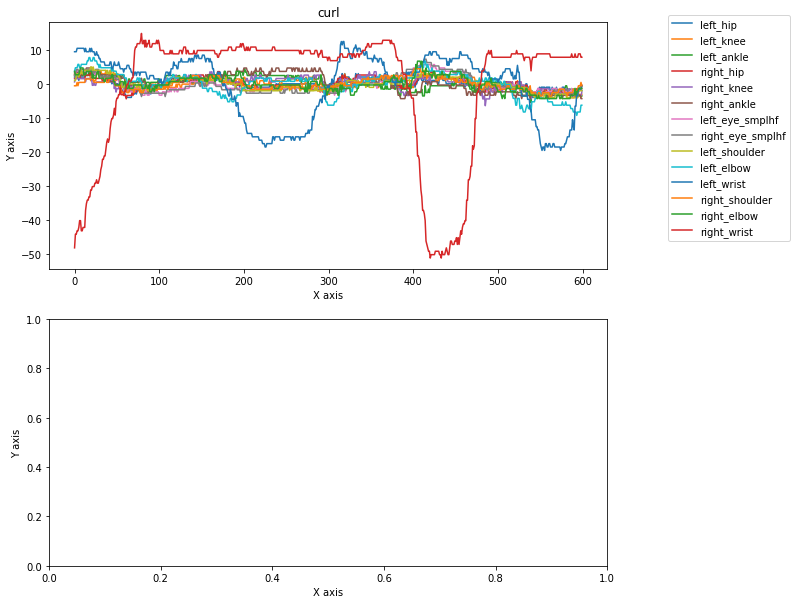

In [19]:
keys=['left_hip','left_knee','left_ankle','right_hip','right_knee','right_ankle','left_eye_smplhf','right_eye_smplhf','left_shoulder','left_elbow','left_wrist','right_shoulder','right_elbow','right_wrist']


sinsoidal_data={}
alldata=[]
for ele in range(0,pd_test_postion_data.shape[0]):
  sinsoidal_data={}
  for key in keys:
    # print(i)
    if(not(key in sinsoidal_data)):
      sinsoidal_data[key]=0
    sinsoidal_data[key]=pd_test_postion_data[key+'_X'][ele]-pd_test_postion_data[key+'_Y'][ele]
  if not('label' in sinsoidal_data):
      sinsoidal_data['label']=pd_test_postion_data['label'][ele]
  alldata.append(sinsoidal_data)
# print(len(alldata))
df_data = pd.DataFrame.from_dict(alldata)
df_group_dat=df_data.groupby('label')



fig, axs = plt.subplots(2, 1,figsize=(10, 10))

index=-1

for name, group in df_data.groupby('label'):
    
    index+=1
    for key in keys:
      x=np.arange(start=0, stop=len(group[key]), step=1)
      x1=np.arange(start=0, stop=len(group[key]), step=1)
      plt.xlabel("X axis")
      plt.ylabel("Y axis")
      axs[index].plot(x1, group[key] ,label=key)
      axs[index].legend(bbox_to_anchor=(1.1, 1.05))
      axs[index].set_xlabel("X axis")
      axs[index].set_ylabel("Y axis")
      axs[index].set_title(name)
#     axs[0].plot(x, birddog[shapes[index]]['x'][0], color =color[index],label=(shapes[index]+"  birddog"))
# axs[1].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[0].legend(bbox_to_anchor=(1.1, 1.05))    
# axs[1].set_title("Rep-1 for Bicyclecrunch Exercise")
# axs[0].set_title("Rep-1 for Birddog Exercise")
plt.show()